# Fraud Detection Project Notebook

Candidate Name: Uday Sadvik Kothapalli
Date: August 23, 2025

This notebook demonstrates proactive fraud detection using simulated transaction data.


## Importing the Required Libraries for EDA (Exploratory Data Analysis)


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("C:/Users/udays/Downloads/Fraud.csv")

In [4]:
# Data preview
print(df.shape)

(6362620, 11)


In [5]:
df.head() # To retrive the top rows of Data set


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
df.isnull().sum() # Finding Null Values

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

## Handling Missing Merchant Balances

--filled missing balance values for merchants with 0.
--added new columns to track balance changes and mistakes.


In [8]:
df[['oldbalanceDest', 'newbalanceDest']] = df[['oldbalanceDest', 'newbalanceDest']].fillna(0)
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [9]:
# Adding New Feauters from old Feauters

df['deltaOrig'] = df['oldbalanceOrg'] - df['newbalanceOrig']

df['deltaDest'] = df['oldbalanceDest'] - df['newbalanceDest']

df['errOrig'] = (df['deltaOrig'] - df['amount']).abs()

df['errDest'] = (df['deltaDest'] - df['amount']).abs()

df['destIsMerchant'] = df['nameDest'].str.startswith('M').astype(int)

df['log_amount'] = np.log1p(df['amount'])

df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,deltaOrig,deltaDest,errOrig,errDest,destIsMerchant,log_amount
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0,1.455192e-11,9839.64,1,9.194276
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0,1.136868e-12,1864.28,1,7.531166
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0,0.000000e+00,181.00,0,5.204007
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,21182.0,0.000000e+00,21001.00,0,5.204007
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0,0.000000e+00,11668.14,1,9.364703


In [12]:
df['isFraud'].value_counts(normalize=True)

0    0.998709
1    0.001291
Name: isFraud, dtype: float64

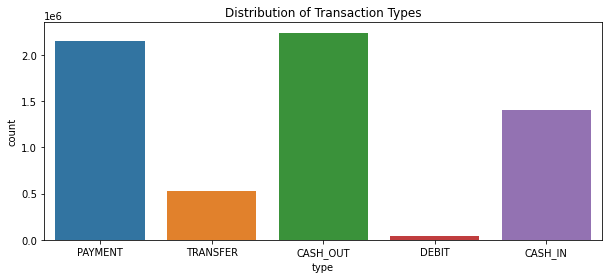

In [13]:
#Visualization about Distribution of Transaction Types

plt.figure(figsize=(10,4))
sns.countplot(x='type', data=df)
plt.title('Distribution of Transaction Types')
plt.show()

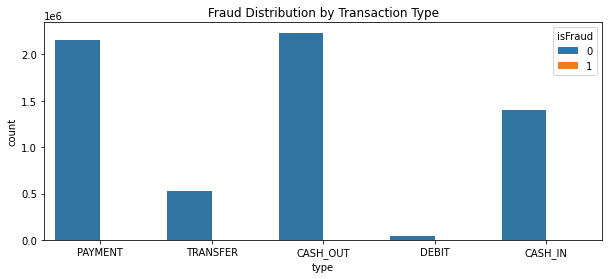

In [14]:
#Visualization about Fraud Distribution by Transaction Type
plt.figure(figsize=(10,4))
sns.countplot(x='type', hue='isFraud', data=df)
plt.title('Fraud Distribution by Transaction Type')
plt.show()

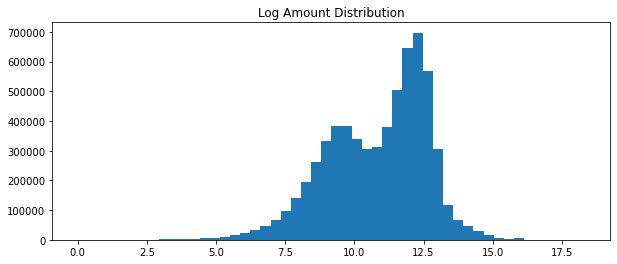

In [15]:
#Visualization about Log Amount Dsistirbution
plt.figure(figsize=(10,4))
plt.hist(df['log_amount'], bins=50)
plt.title('Log Amount Distribution')
plt.show()

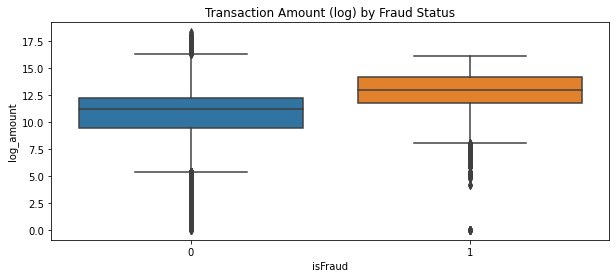

In [16]:
# Boxplot: Amount by Fraud Status
plt.figure(figsize=(10,4))
sns.boxplot(x='isFraud', y='log_amount', data=df)
plt.title('Transaction Amount (log) by Fraud Status')
plt.show()

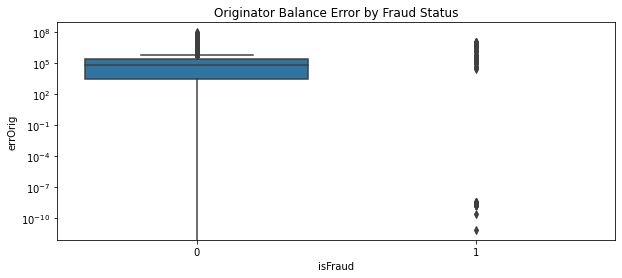

In [17]:
plt.figure(figsize=(10,4))
sns.boxplot(x='isFraud', y='errOrig', data=df)
plt.yscale('log')
plt.title('Originator Balance Error by Fraud Status')
plt.show()

In [18]:
# Correlation matrix
num_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
            'newbalanceDest', 'deltaOrig', 'deltaDest', 'errOrig', 'errDest', 'log_amount']

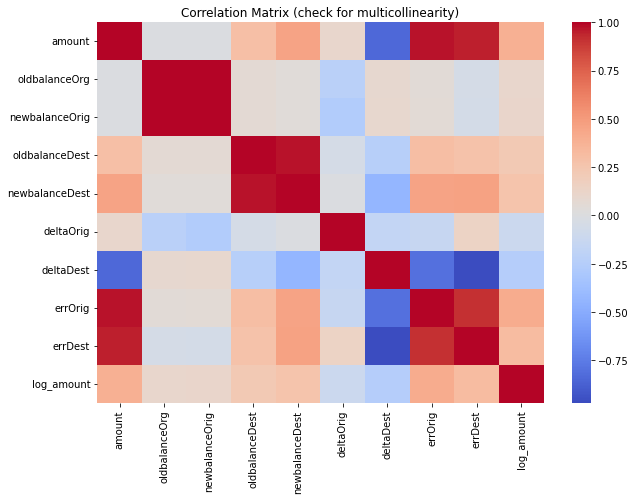

In [19]:
corr = df[num_cols].corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation Matrix (check for multicollinearity)")
plt.show()

In [20]:
# Prepare features and target
features = ['log_amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest',
            'deltaOrig', 'deltaDest', 'errOrig', 'errDest', 'type', 'destIsMerchant']

In [21]:
target = 'isFraud'

## Logistic Regression: Simple and easy to explain.

## Gradient Boosting: More complex, usually better at finding patterns.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import (classification_report, confusion_matrix, 
                           roc_auc_score, roc_curve, precision_recall_curve)
from sklearn.feature_selection import SelectKBest, f_classif

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [26]:
#Spliting the data for the Model evaluation
X = df[features]
y = df[target]

In [28]:
#Dividing the feauters for Preprocessing Pipeline

numeric_features = ['log_amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
                    'newbalanceDest', 'deltaOrig', 'deltaDest', 'errOrig', 'errDest']


In [29]:

categorical_features = ['type', 'destIsMerchant']


In [30]:
preprocess = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

In [32]:

lr_model = Pipeline([
    ('prep', preprocess),
    ('clf', LogisticRegression(max_iter=200, class_weight='balanced'))
])
lr_model.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['log_amount',
                                                   'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest',
                                                   'deltaOrig', 'deltaDest',
                                                   'errOrig', 'errDest']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['type',
                                                   'destIsMerchant'])])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=200))])

In [34]:
# Gradient Boosting Model
hgb_model = Pipeline([
    ('prep', preprocess),
    ('clf', HistGradientBoostingClassifier(max_iter=200, random_state=42))
])
hgb_model.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['log_amount',
                                                   'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest',
                                                   'deltaOrig', 'deltaDest',
                                                   'errOrig', 'errDest']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['type',
                                                   'destIsMerchant'])])),
                ('clf',
                 HistGradientBoostingClassifier(max_iter=200,
                                                random_state=42))])

In [35]:
# Logistic Regression
y_pred_lr = lr_model.predict(X_test)
y_prob_lr = lr_model.predict_proba(X_test)[:,1]

In [36]:
confusion_matrix(y_test, y_pred_lr)

array([[1189645,   81236],
       [     16,    1627]], dtype=int64)

In [39]:
classification_report(y_test, y_pred_lr, digits=4)


'              precision    recall  f1-score   support\n\n           0     1.0000    0.9361    0.9670   1270881\n           1     0.0196    0.9903    0.0385      1643\n\n    accuracy                         0.9361   1272524\n   macro avg     0.5098    0.9632    0.5027   1272524\nweighted avg     0.9987    0.9361    0.9658   1272524\n'

In [40]:
roc_auc_score(y_test, y_prob_lr)

0.9910848225436523

In [41]:
# Gradient Boosting
y_pred_hgb = hgb_model.predict(X_test)
y_prob_hgb = hgb_model.predict_proba(X_test)[:,1]

In [42]:
confusion_matrix(y_test, y_pred_hgb)

array([[1270864,      17],
       [     17,    1626]], dtype=int64)

In [43]:
classification_report(y_test, y_pred_hgb, digits=4)

'              precision    recall  f1-score   support\n\n           0     1.0000    1.0000    1.0000   1270881\n           1     0.9897    0.9897    0.9897      1643\n\n    accuracy                         1.0000   1272524\n   macro avg     0.9948    0.9948    0.9948   1272524\nweighted avg     1.0000    1.0000    1.0000   1272524\n'

In [44]:
roc_auc_score(y_test, y_prob_hgb)

0.9918081723615078

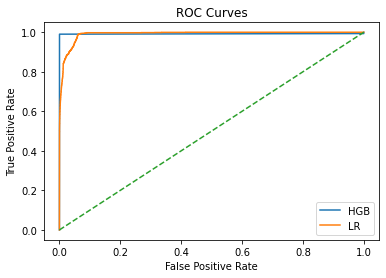

In [46]:
# ROC Curve
fpr_hgb, tpr_hgb, _ = roc_curve(y_test, y_prob_hgb)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
plt.plot(fpr_hgb, tpr_hgb, label="HGB")
plt.plot(fpr_lr, tpr_lr, label="LR")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()

In [48]:
from sklearn.inspection import permutation_importance

In [50]:
#Model Building

hgb_clf = hgb_model.named_steps['clf']
feature_names = (
    numeric_features + 
    list(hgb_model.named_steps['prep'].transformers_[1][1].get_feature_names_out(categorical_features))
)

errOrig           0.112138
newbalanceOrig    0.107271
deltaOrig         0.002973
log_amount        0.002624
newbalanceDest    0.001433
errDest           0.001084
deltaDest         0.000573
oldbalanceOrg     0.000377
oldbalanceDest    0.000253
type_TRANSFER     0.000080
dtype: float64


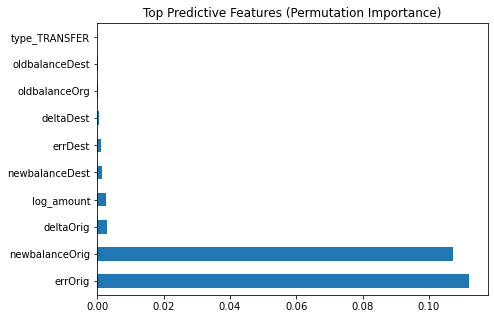

In [51]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    hgb_clf,
    hgb_model.named_steps['prep'].transform(X_test),
    y_test,
    n_repeats=10,
    random_state=42
)
importances = pd.Series(result.importances_mean, index=feature_names).sort_values(ascending=False)
print(importances.head(10))

importances.head(10).plot(kind='barh', figsize=(7,5))
plt.title("Top Predictive Features (Permutation Importance)")
plt.show()


I picked Variables that make sense for fraus that we have columns like transaction amount balances before and after and i checked any of two columns having similar using Heatmap

The most important key factors are amount of money moved ,Transaction Type, Balances changes

For the prevention we should be adopted while updating
Test New models
Monitoring the model 
Keeping the Data secure
Training the people with new tools
Receving the feedback

Assuming the actions like:

Track Fraud rates
Watch false alarms
Check customer satisfaction
Ask fraud analysts

Summary:

-Data cleaning
-Feature selection
-Train-test split
-Preprocessing
-Model building
-Model evaluation
-Key factors
-Monitoring
-Measure results